<a href="https://colab.research.google.com/github/surbhiagrawal22/MachineLearning-DeepLearning-codes/blob/master/MedicalDrugExperimentalTestClassificationUsingSequentailModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement and help taken from https://deeplizard.com/learn/video/LhEMXbjGV_4 :- 

In  an experimental test, drug was tested on individuals ranging from age 13 to 100 in a clinical trial.
 The trial had 2100 participants. Half of the participants were under 65 years old, and the other half was 65 years of age or older.

 The trial showed that around 95% of patients 65 or older experienced side effects from the drug, and around 95% of patients under 65 experienced no side effects, generally showing that elderly individuals were more likely to experience side effects.

In [145]:
## importing neccsaray libraries
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
import random
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [114]:
## generating the data set for analysis:
train_samples=[]
train_labels=[]
for i in range(50):

  #around 5% of patients under 65 experienced  side effects,
     number=random.randint(13,64)
     train_samples.append(number)
     train_labels.append(1)

   #5% of patients 65 or older experienced no side effects from the drug,    
     number=random.randint(65,100)
     train_samples.append(number)
     train_labels.append(0)
  
for i in range(1000):
   #around 95% of patients under 65 experienced no side effects,
     number=random.randint(13,64)
     train_samples.append(number)
     train_labels.append(0)

     #95% of patients 65 or older experienced side effects from the drug,   
     number=random.randint(65,100)
     train_samples.append(number)
     train_labels.append(1)

  

In [ ]:
## converting to numpy array 
train_labels=np.array(train_labels)
train_samples=np.array(train_samples)

## counting the unique values and their count in a numpy array 
unique,counts=np.unique(train_labels,return_counts=True)

# converting into a table form 
print(np.asarray((unique,counts)).T)

In [ ]:
# shuffling the dataset before fitting the model
train_samples,train_labels=shuffle(train_samples,train_labels)

# Scaling the data ,all age values will between 0 and 1
scaler=MinMaxScaler(feature_range=(0, 1))

#Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1)
scaled_train_samples=scaler.fit_transform(train_samples.reshape(-1,1))
print(scaled_train_samples)

print(scaled_train_samples.shape)
print(train_labels.shape)


In [117]:
# define a basic architecture model
model=Sequential(
    [Dense(16,activation="relu",input_shape=(1,),name="First_Hidden"),
    Dense(32,activation="relu",name="Second_hidden_layer"),
    Dense(64,activation="relu",name="Third_hidden_layer"),
    Dense(2,activation="softmax")])
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(learning_rate=.0001),metrics="accuracy")

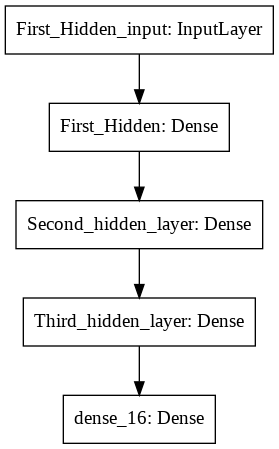

In [118]:
%matplotlib inline
tf.keras.utils.plot_model(model)


In [119]:
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
First_Hidden (Dense)         (None, 16)                32        
_________________________________________________________________
Second_hidden_layer (Dense)  (None, 32)                544       
_________________________________________________________________
Third_hidden_layer (Dense)   (None, 64)                2112      
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 130       
Total params: 2,818
Trainable params: 2,818
Non-trainable params: 0
_________________________________________________________________
None


In [120]:
fitted_model=model.fit(scaled_train_samples,train_labels,batch_size=10,epochs=30,verbose=2,shuffle=True,validation_split=.1)

Epoch 1/30
189/189 - 1s - loss: 0.6327 - accuracy: 0.5836 - val_loss: 0.5803 - val_accuracy: 0.7048
Epoch 2/30
189/189 - 0s - loss: 0.5775 - accuracy: 0.6878 - val_loss: 0.5205 - val_accuracy: 0.8048
Epoch 3/30
189/189 - 0s - loss: 0.5057 - accuracy: 0.8042 - val_loss: 0.4471 - val_accuracy: 0.8429
Epoch 4/30
189/189 - 0s - loss: 0.4283 - accuracy: 0.8677 - val_loss: 0.3823 - val_accuracy: 0.8714
Epoch 5/30
189/189 - 0s - loss: 0.3665 - accuracy: 0.8910 - val_loss: 0.3388 - val_accuracy: 0.8952
Epoch 6/30
189/189 - 0s - loss: 0.3242 - accuracy: 0.9101 - val_loss: 0.3122 - val_accuracy: 0.9238
Epoch 7/30
189/189 - 0s - loss: 0.2977 - accuracy: 0.9233 - val_loss: 0.2976 - val_accuracy: 0.9429
Epoch 8/30
189/189 - 0s - loss: 0.2824 - accuracy: 0.9344 - val_loss: 0.2893 - val_accuracy: 0.9333
Epoch 9/30
189/189 - 0s - loss: 0.2737 - accuracy: 0.9333 - val_loss: 0.2843 - val_accuracy: 0.9429
Epoch 10/30
189/189 - 0s - loss: 0.2679 - accuracy: 0.9370 - val_loss: 0.2809 - val_accuracy: 0.9429

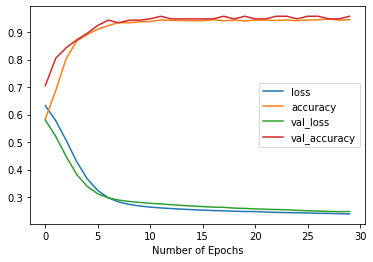

In [121]:
# plotting the history attribute of the model ( we observe both validation and training accuracy is increasing with number of epcohs 
#and loss/validation loss is decreasing with number of epochs)
hist=pd.DataFrame(fitted_model.history)
hist.plot(xlabel="Number of Epochs")

In [ ]:
# getting the weights of the model
print(model.weights)

In [123]:
## generating some data for prediction
## generating the data set :
pedict_samples=[]
predict_labels=[]
for i in range(10):

  #around 5% of patients under 65 experienced  side effects,
     number=random.randint(13,64)
     pedict_samples.append(number)
     predict_labels.append(1)

   #5% of patients 65 or older experienced no side effects from the drug,    
     number=random.randint(65,100)
     pedict_samples.append(number)
     predict_labels.append(0)
  
for i in range(200):
   #around 95% of patients under 65 experienced no side effects,
     number=random.randint(13,64)
     pedict_samples.append(number)
     predict_labels.append(0)

     #95% of patients 65 or older experienced side effects from the drug,   
     number=random.randint(65,100)
     pedict_samples.append(number)
     predict_labels.append(1)


In [ ]:

# pre-processing the testing data      
pedict_samples=np.array(pedict_samples)
predict_labels=np.array(predict_labels)
pedict_samples,predict_labels=shuffle(pedict_samples,predict_labels)

# scaling the testing data
scaler=MinMaxScaler(feature_range=(0, 1))
#Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1)
scaled_pedict_samples=scaler.fit_transform(pedict_samples.reshape(-1,1))

# print(scaled_pedict_samples)

# print(scaled_pedict_samples.shape)
# print(predict_labels.shape)


In [ ]:
# using the model for predition
pred=model.predict(scaled_pedict_samples,verbose=0)
print(pred)

# simce probablities are given , we will use np.argmax for specifyin the axis which has maximum value
pred=np.argmax(pred,axis=-1)
print(pred)

In [ ]:
# creating a confusion matrix
conf=confusion_matrix(y_true=predict_labels,y_pred=pred)
print(conf)


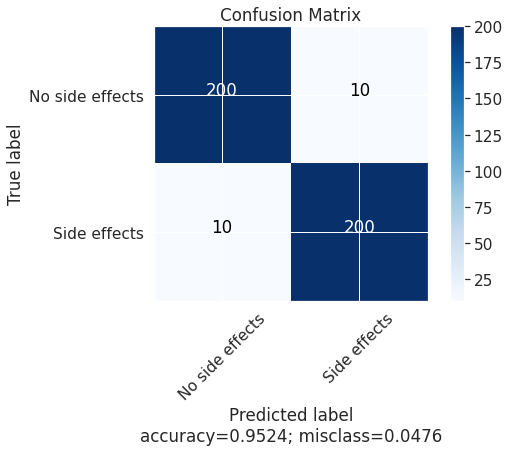

In [140]:
# code taken from skikit learn library
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

plot_confusion_matrix(cm=conf, normalize=False ,               
                          target_names =["No side effects","Side effects"],       # list of names of the classes
                          title        = "Confusion Matrix",cmap=plt.cm.Blues)    

In [142]:
## saving the model for future use
import os

# checking if the same name file already existed or not  
if os.path.isfile("MedicalExperimentalTest.h5") is False:
      model.save("MedicalExperimentalTest.h5")

In [ ]:
opened_model=load_model("MedicalExperimentalTest.h5")
print(opened_model.summary())
# print(opened_model.weights)
# print(opened_model.optimizer)
# print(opened_model.loss)